# First: Data Cleaning and Exploratory

### Explore data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('car_price_prediction.csv')

### categorical 
df.info()

### numerical
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [3]:
numerical_df = df.select_dtypes(include='number')
hcorr = numerical_df.corr()
hcorr.style.background_gradient()

,ID,Price,Prod. year,Cylinders,Airbags
ID,1.000000,-0.000844,0.071352,-0.039319,-0.020527
Price,-0.000844,1.000000,0.012982,0.007518,-0.012824
Prod. year,0.071352,0.012982,1.000000,-0.096797,0.236969
Cylinders,-0.039319,0.007518,-0.096797,1.000000,0.176868
Airbags,-0.020527,-0.012824,0.236969,0.176868,1.000000


## Check for missing value

In [2]:
# your code
print(df.shape)

print(df.isnull().sum())

(19237, 18)
ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64


C:\Users\Justin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Justin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Justin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Justin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

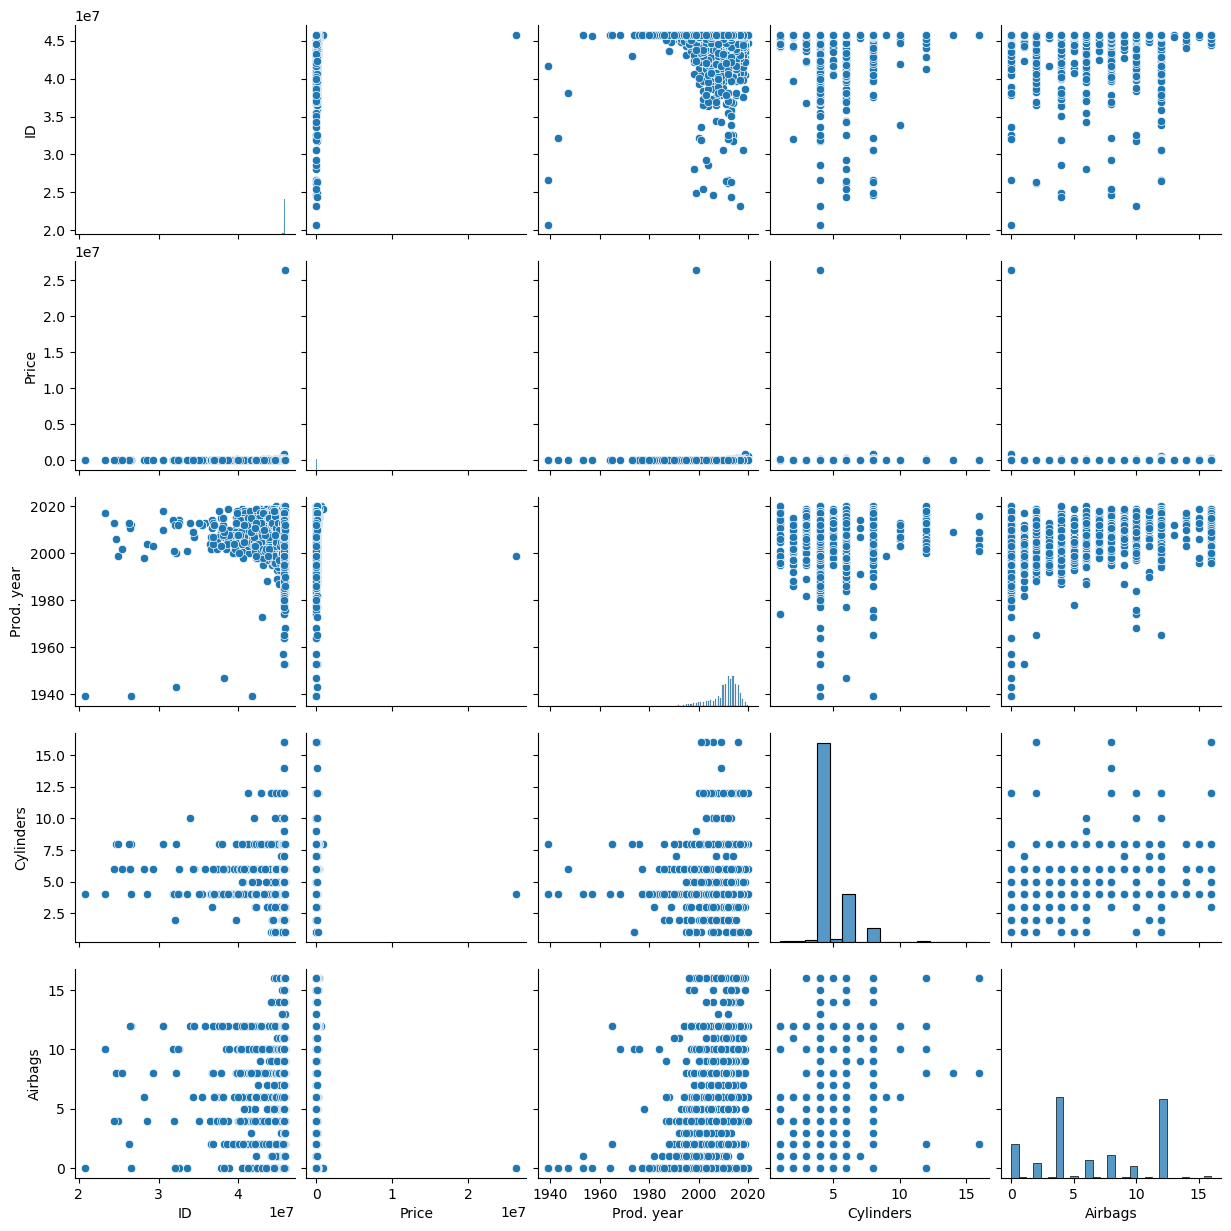

In [3]:
##2.B Use Scatterplot ro identify the most important variable
sns.pairplot(df)

## Clean the data

### Remove ID column

In [4]:
df = df.drop('ID', axis=1)
df.head(5)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  object 
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  object 
 9   Mileage           19237 non-null  object 
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Doors             19237 non-null  object 
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-null  int64 

## Need to change all features into int or floats

### Cleaning Levy and changing it to a float or int

In [6]:
print("Unique value for Levy\n", df['Levy'].unique())

Unique value for Levy
 ['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'
 '798' '1277' '442' '1051' '790' '1292' '1047' '528' '1211' '1493' '1793'
 '574' '930' '1998' '271' '706' '1481' '1677' '1661' '1286' '1408' '1090'
 '595' '1451' '1267' '993' '1714' '878' '641' '749' '1511' '603' '353'
 '877' '1236' '1141' '397' '784'

In [7]:
print(df.iloc[2]['Levy'])

-


### Replace "-" with the mean or median of Levy but first need to check its distribution 

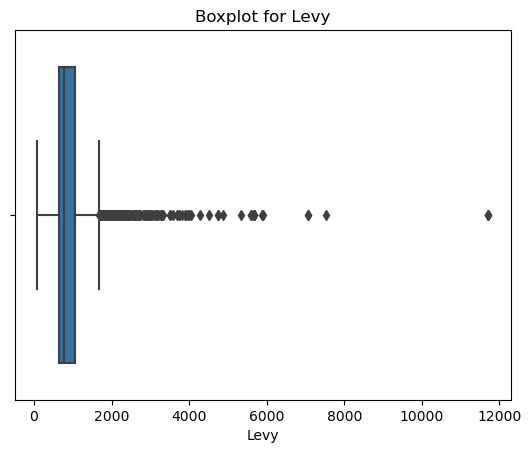

In [8]:
df['Levy'] = pd.to_numeric(df['Levy'], errors='coerce')


sns.boxplot(x=df['Levy'])
plt.title(f'Boxplot for Levy')
plt.show()

### Remove the outliers

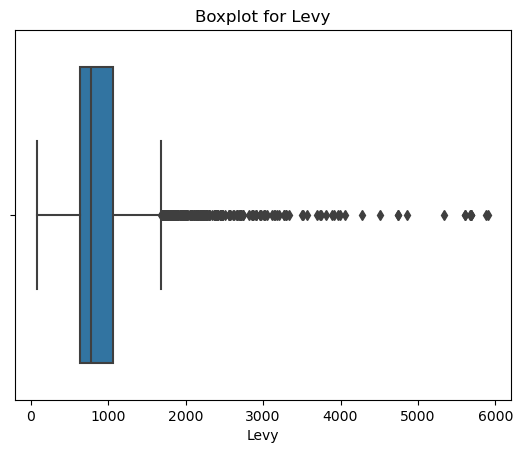

In [9]:
df = df[df['Levy'] <= 6000]
sns.boxplot(x=df['Levy'])
plt.title(f'Boxplot for Levy')
plt.show()

C:\Users\Justin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


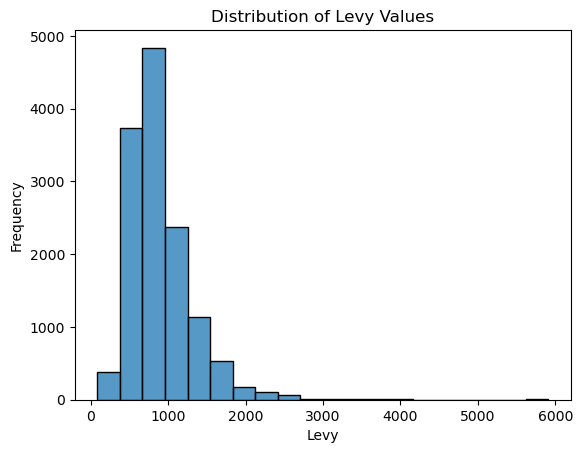

In [10]:
sns.histplot(df['Levy'], bins=20)
plt.title('Distribution of Levy Values')
plt.xlabel('Levy')
plt.ylabel('Frequency')
plt.show()

### Its a long tail Distribution, so I would replace the Levy Value with the median

In [11]:
#  replace Null values in "Levy" with mean of "Levy" col
df['Levy'].fillna( df['Levy'].median(), inplace=True)

In [12]:
print("Unique value for Levy\n", df['Levy'].unique())

Unique value for Levy
 [1399. 1018.  862.  446.  891.  761.  751.  394. 1053. 1055. 1079.  810.
 2386. 1850.  531.  586. 1249. 2455.  583. 1537. 1288.  915. 1750.  707.
 1077. 1486. 1091.  650.  382. 1436. 1194.  503. 1017. 1104.  639.  629.
  919.  781.  530.  640.  765.  777.  779.  934.  769.  645. 1185. 1324.
  830. 1187. 1111.  760.  642. 1604. 1095.  966.  473. 1138. 1811.  988.
  917. 1156.  687.  836. 1347. 2866. 1646.  259.  609.  697.  585.  475.
  690.  308. 1823. 1361. 1273.  924.  584. 2078.  831. 1172.  893. 1872.
 1885. 1266.  447. 2148. 1730.  730.  289.  502.  333. 1325.  247.  879.
 1342. 1327. 1598. 1514. 1058.  738. 1935.  481. 1522. 1282.  456.  880.
  900.  798. 1277.  442. 1051.  790. 1292. 1047.  528. 1211. 1493. 1793.
  574.  930. 1998.  271.  706. 1481. 1677. 1661. 1286. 1408. 1090.  595.
 1451. 1267.  993. 1714.  878.  641.  749. 1511.  603.  353.  877. 1236.
 1141.  397.  784. 1024. 1357. 1301.  770.  922. 1438.  753.  607. 1363.
  638.  490.  431.  565.  51

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13412 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13412 non-null  int64  
 1   Levy              13412 non-null  float64
 2   Manufacturer      13412 non-null  object 
 3   Model             13412 non-null  object 
 4   Prod. year        13412 non-null  int64  
 5   Category          13412 non-null  object 
 6   Leather interior  13412 non-null  object 
 7   Fuel type         13412 non-null  object 
 8   Engine volume     13412 non-null  object 
 9   Mileage           13412 non-null  object 
 10  Cylinders         13412 non-null  float64
 11  Gear box type     13412 non-null  object 
 12  Drive wheels      13412 non-null  object 
 13  Doors             13412 non-null  object 
 14  Wheel             13412 non-null  object 
 15  Color             13412 non-null  object 
 16  Airbags           13412 non-null  int64  
dty

### Cleaning Manufacturer and changing it to a float or int

In [14]:
print("Unique value for Manufacturer\n", df['Manufacturer'].unique())

Unique value for Manufacturer
 ['LEXUS' 'CHEVROLET' 'FORD' 'HONDA' 'HYUNDAI' 'TOYOTA' 'MERCEDES-BENZ'
 'PORSCHE' 'VOLKSWAGEN' 'AUDI' 'NISSAN' 'BMW' 'SUBARU' 'DAEWOO'
 'SSANGYONG' 'MAZDA' 'GMC' 'KIA' 'INFINITI' 'FIAT' 'OPEL' 'MITSUBISHI'
 'ACURA' 'CITROEN' 'RENAULT' 'JEEP' 'DODGE' 'MINI' 'CHRYSLER' 'JAGUAR'
 'DAIHATSU' 'BUICK' 'LAND ROVER' 'TESLA' 'CADILLAC' 'SUZUKI' 'LINCOLN'
 'BENTLEY' 'MERCURY' 'VOLVO' 'VAZ' 'MASERATI' 'FERRARI' 'SKODA'
 'LAMBORGHINI' 'PEUGEOT' 'GAZ' 'SCION' 'HUMMER']


### Using label encoding to encode the Manufacturer

In [15]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Manufacturer'] = labelencoder.fit_transform(df['Manufacturer'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13412 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13412 non-null  int64  
 1   Levy              13412 non-null  float64
 2   Manufacturer      13412 non-null  int32  
 3   Model             13412 non-null  object 
 4   Prod. year        13412 non-null  int64  
 5   Category          13412 non-null  object 
 6   Leather interior  13412 non-null  object 
 7   Fuel type         13412 non-null  object 
 8   Engine volume     13412 non-null  object 
 9   Mileage           13412 non-null  object 
 10  Cylinders         13412 non-null  float64
 11  Gear box type     13412 non-null  object 
 12  Drive wheels      13412 non-null  object 
 13  Doors             13412 non-null  object 
 14  Wheel             13412 non-null  object 
 15  Color             13412 non-null  object 
 16  Airbags           13412 non-null  int64  
dty

### Cleaning Model and changing it to a float or int

In [17]:
print("Unique value for Model\n", df['Model'].unique())

Unique value for Model
 ['RX 450' 'Equinox' 'Escape' 'FIT' 'Santa FE' 'Prius' 'Sonata' 'Camry'
 'E 350' 'CHR' 'Elantra' 'RX 400' 'GX 470' 'Highlander' 'Vito' 'Cayenne'
 'CHR Limited' 'H1' 'Jetta' 'Tacoma' 'Prius C' 'Civic' 'Q7' 'E 300' 'Q5'
 'Juke' '535' 'Cruze LT' 'Fusion' 'Tucson' 'Captiva' 'ML 350' 'Yaris'
 'Cruze' 'Orlando' 'GL 63 AMG' 'Forester' 'Lacetti' 'Genesis' '911'
 'GX 460' 'Focus SE' 'X5' 'Explorer' 'Korando' '616' 'Maxima' 'Volt'
 'TERRAIN' 'Hr-v EX' 'Elantra sport limited' 'Sienna' 'Aqua' 'NX 300'
 'REXTON' 'Carnival grand' 'QX60' 'Passat' '1000' 'C 250' '325' 'A6'
 'Transit' '500' 'A7' 'I30' 'CT 200h' 'Panamera' 'CLS 550' 'Avalanche'
 'Avalon LIMITED' 'Cerato K3' 'CX-7' 'Corolla' 'GLA 250' 'Sharan' 'C 300'
 'Actyon' 'Tundra' 'C 350' 'RAV 4 Le' 'Zafira' 'E 350 ამგ' 'Cr-v' 'Avalon'
 'ML 250' 'Colt Lancer' 'Outlander' 'GLE 350' 'Malibu' 'TL' 'RX 350'
 'Insight' 'Altima' 'I' 'GTI' 'C-MAX' 'RAV 4 s p o r t' 'Fusion Titanium'
 'Aveo' 'X6' 'Aqua S' 'Astra' 'Optima' '328 Xdrive

### Using label encoding to encode the Model

In [18]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Model'] = labelencoder.fit_transform(df['Model'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13412 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13412 non-null  int64  
 1   Levy              13412 non-null  float64
 2   Manufacturer      13412 non-null  int32  
 3   Model             13412 non-null  int32  
 4   Prod. year        13412 non-null  int64  
 5   Category          13412 non-null  object 
 6   Leather interior  13412 non-null  object 
 7   Fuel type         13412 non-null  object 
 8   Engine volume     13412 non-null  object 
 9   Mileage           13412 non-null  object 
 10  Cylinders         13412 non-null  float64
 11  Gear box type     13412 non-null  object 
 12  Drive wheels      13412 non-null  object 
 13  Doors             13412 non-null  object 
 14  Wheel             13412 non-null  object 
 15  Color             13412 non-null  object 
 16  Airbags           13412 non-null  int64  
dty

### Cleaning Category and changing it to a float or int

In [20]:
print("Unique value for Category\n", df['Category'].unique())

Unique value for Category
 ['Jeep' 'Hatchback' 'Sedan' 'Goods wagon' 'Universal' 'Minivan' 'Coupe'
 'Microbus' 'Cabriolet' 'Pickup']


### Using label encoding to encode the Category

In [21]:

labelencoder = LabelEncoder()
df['Category'] = labelencoder.fit_transform(df['Category'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13412 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13412 non-null  int64  
 1   Levy              13412 non-null  float64
 2   Manufacturer      13412 non-null  int32  
 3   Model             13412 non-null  int32  
 4   Prod. year        13412 non-null  int64  
 5   Category          13412 non-null  int32  
 6   Leather interior  13412 non-null  object 
 7   Fuel type         13412 non-null  object 
 8   Engine volume     13412 non-null  object 
 9   Mileage           13412 non-null  object 
 10  Cylinders         13412 non-null  float64
 11  Gear box type     13412 non-null  object 
 12  Drive wheels      13412 non-null  object 
 13  Doors             13412 non-null  object 
 14  Wheel             13412 non-null  object 
 15  Color             13412 non-null  object 
 16  Airbags           13412 non-null  int64  
dty

### Cleaning Leather interior, Fuel type, Gear box type, Drive wheel, Doors, Wheel, color and changing it to a float or int

In [23]:
print("Unique value for Leather interior\n", df['Leather interior'].unique())
print("\nUnique value for Fuel type\n", df['Fuel type'].unique())
print("\nUnique value for Gear box type\n", df['Gear box type'].unique())
print("\nUnique value for Drive wheels\n", df['Drive wheels'].unique())
print("\nUnique value for Doors\n", df['Doors'].unique())
print("\nUnique value for Wheel\n", df['Wheel'].unique())
print("\nUnique value for Color\n", df['Color'].unique())

Unique value for Leather interior
 ['Yes' 'No']

Unique value for Fuel type
 ['Hybrid' 'Petrol' 'Diesel' 'Plug-in Hybrid' 'LPG' 'CNG']

Unique value for Gear box type
 ['Automatic' 'Tiptronic' 'Manual' 'Variator']

Unique value for Drive wheels
 ['4x4' 'Front' 'Rear']

Unique value for Doors
 ['04-May' '02-Mar' '>5']

Unique value for Wheel
 ['Left wheel' 'Right-hand drive']

Unique value for Color
 ['Silver' 'Black' 'White' 'Grey' 'Blue' 'Red' 'Sky blue' 'Orange' 'Green'
 'Yellow' 'Brown' 'Beige' 'Carnelian red' 'Golden' 'Pink' 'Purple']


### Using label encoding to encode Leather interior, Fuel type, Gear box type, Drive wheel, Doors, Wheel, color


In [24]:

labelencoder = LabelEncoder()
df['Leather interior'] = labelencoder.fit_transform(df['Leather interior'])
df['Fuel type'] = labelencoder.fit_transform(df['Fuel type'])
df['Gear box type'] = labelencoder.fit_transform(df['Gear box type'])
df['Drive wheels'] = labelencoder.fit_transform(df['Drive wheels'])
df['Doors'] = labelencoder.fit_transform(df['Doors'])
df['Wheel'] = labelencoder.fit_transform(df['Wheel'])
df['Color'] = labelencoder.fit_transform(df['Color'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13412 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13412 non-null  int64  
 1   Levy              13412 non-null  float64
 2   Manufacturer      13412 non-null  int32  
 3   Model             13412 non-null  int32  
 4   Prod. year        13412 non-null  int64  
 5   Category          13412 non-null  int32  
 6   Leather interior  13412 non-null  int32  
 7   Fuel type         13412 non-null  int32  
 8   Engine volume     13412 non-null  object 
 9   Mileage           13412 non-null  object 
 10  Cylinders         13412 non-null  float64
 11  Gear box type     13412 non-null  int32  
 12  Drive wheels      13412 non-null  int32  
 13  Doors             13412 non-null  int32  
 14  Wheel             13412 non-null  int32  
 15  Color             13412 non-null  int32  
 16  Airbags           13412 non-null  int64  
dty

### Cleaning Engine Volume and changing it to a float or int

In [26]:
print("\nUnique value for Engine volume\n", df['Engine volume'].unique())


Unique value for Engine volume
 ['3.5' '3' '2.5' '1.3' '2' '1.8' '2.4' '3.3' '1.6' '4.7' '2.0 Turbo'
 '1.4 Turbo' '3.6' '4' '1.5' '1.6 Turbo' '2.2' '1.4' '5.5' '3.8' '4.6'
 '2.3' '2.9' '1.8 Turbo' '2.4 Turbo' '2.7' '4.8' '5.3' '0.4' '2.1' '1.7'
 '0.7' '3.2' '2.2 Turbo' '4.4' '1.3 Turbo' '3.0 Turbo' '1' '4.4 Turbo'
 '1.9' '2.5 Turbo' '0.8' '1.5 Turbo' '3.5 Turbo' '5.7' '1.2' '4.6 Turbo'
 '6.7' '6.2' '1.2 Turbo' '3.4' '1.7 Turbo' '2.9 Turbo' '0' '1.9 Turbo'
 '3.7' '20' '2.7 Turbo' '5.5 Turbo' '0.2' '5.6' '2.8' '4.7 Turbo' '5'
 '6.8' '6' '7.3' '3.6 Turbo' '4.5 Turbo' '0.8 Turbo' '4.5' '5.4'
 '2.8 Turbo' '6.4' '6.3' '3.9' '4.2' '0.1' '1.1' '2.3 Turbo' '4.3'
 '0.7 Turbo' '1.0 Turbo' '2.6' '2.1 Turbo' '5.2' '3.7 Turbo']


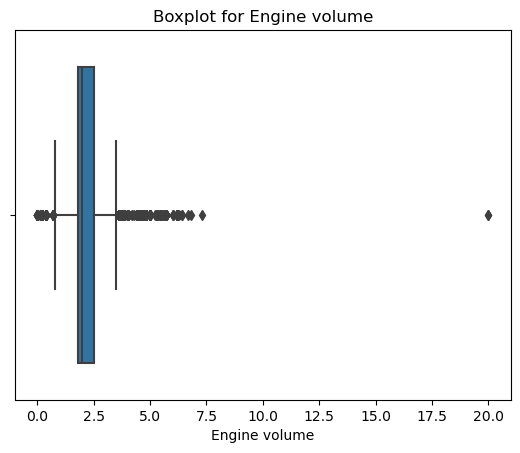

In [27]:
# remover all the turbo and replace with NaN
df['Engine volume'] = pd.to_numeric(df['Engine volume'], errors='coerce')

sns.boxplot(x=df['Engine volume'])
plt.title(f'Boxplot for Engine volume')
plt.show()

### Remove Outliers

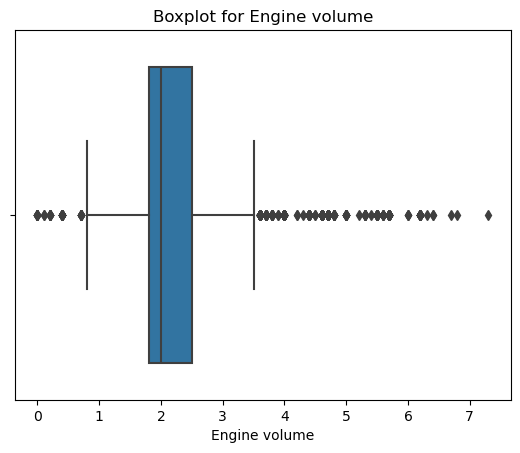

In [28]:
df = df[df['Engine volume'] <= 7.5]
sns.boxplot(x=df['Engine volume'])
plt.title(f'Boxplot for Engine volume')
plt.show()

C:\Users\Justin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


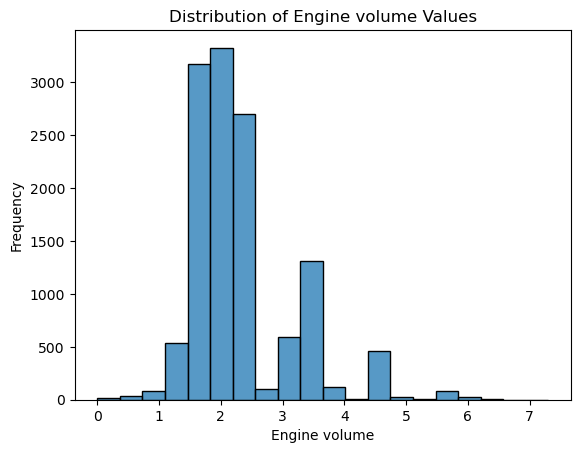

In [29]:
sns.histplot(df['Engine volume'], bins=20)
plt.title('Distribution of Engine volume Values')
plt.xlabel('Engine volume')
plt.ylabel('Frequency')
plt.show()

### Going replace the NaN value with the median

In [30]:
df['Engine volume'].fillna( df['Engine volume'].mean(), inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12630 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             12630 non-null  int64  
 1   Levy              12630 non-null  float64
 2   Manufacturer      12630 non-null  int32  
 3   Model             12630 non-null  int32  
 4   Prod. year        12630 non-null  int64  
 5   Category          12630 non-null  int32  
 6   Leather interior  12630 non-null  int32  
 7   Fuel type         12630 non-null  int32  
 8   Engine volume     12630 non-null  float64
 9   Mileage           12630 non-null  object 
 10  Cylinders         12630 non-null  float64
 11  Gear box type     12630 non-null  int32  
 12  Drive wheels      12630 non-null  int32  
 13  Doors             12630 non-null  int32  
 14  Wheel             12630 non-null  int32  
 15  Color             12630 non-null  int32  
 16  Airbags           12630 non-null  int64  
dty

### Lastly, Cleaning Mileage and chainging it into a float or int

In [32]:
print("\nUnique value for Mileage\n", df['Mileage'].unique())


Unique value for Mileage
 ['186005 km' '192000 km' '168966 km' ... '132700 km' '307325 km'
 '186923 km']


In [33]:
# Remove non-numeric characters of km and convert 'Mileage' to integers
df['Mileage'] = df['Mileage'].str.replace(' km', '').str.replace(',', '')
df['Mileage']=df['Mileage'] .astype(int)
df['Mileage']

0        186005
1        192000
3        168966
4         91901
5        160931
          ...  
19231    107800
19233    161600
19234    116365
19235     51258
19236    186923
Name: Mileage, Length: 12630, dtype: int32

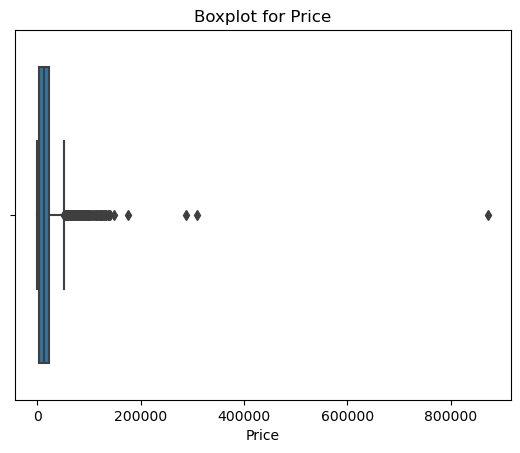

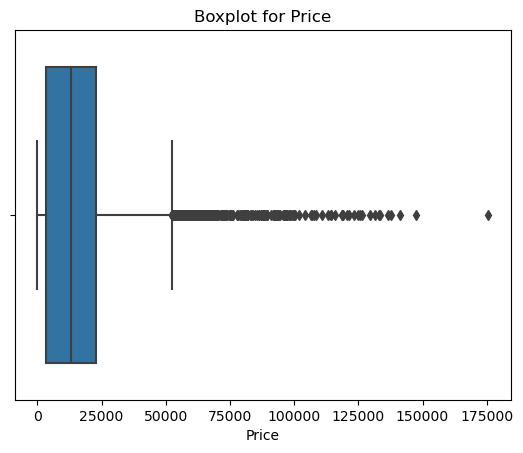

In [34]:
sns.boxplot(x=df['Price'])
plt.title(f'Boxplot for Price')
plt.show()

df = df[df['Price'] < 200000]
sns.boxplot(x=df['Price'])
plt.title(f'Boxplot for Price')
plt.show()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12627 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             12627 non-null  int64  
 1   Levy              12627 non-null  float64
 2   Manufacturer      12627 non-null  int32  
 3   Model             12627 non-null  int32  
 4   Prod. year        12627 non-null  int64  
 5   Category          12627 non-null  int32  
 6   Leather interior  12627 non-null  int32  
 7   Fuel type         12627 non-null  int32  
 8   Engine volume     12627 non-null  float64
 9   Mileage           12627 non-null  int32  
 10  Cylinders         12627 non-null  float64
 11  Gear box type     12627 non-null  int32  
 12  Drive wheels      12627 non-null  int32  
 13  Doors             12627 non-null  int32  
 14  Wheel             12627 non-null  int32  
 15  Color             12627 non-null  int32  
 16  Airbags           12627 non-null  int64  
dty

# Before making model, I want to view the top 5 things in Prod year, model, Category, Manufacturer, color

In [36]:
view_df = pd.read_csv('car_price_prediction.csv')

Features = ["Prod. year", "Model", "Category", "Manufacturer", "Color"]

# Print top 5 values for each feature
for feature in Features:
    top5 = view_df[feature].value_counts().head(5)
    print(f"Top 5 values for {feature}:")
    print(top5)
    print()

Top 5 values for Prod. year:
Prod. year
2012    2155
2014    2124
2013    1963
2011    1612
2015    1549
Name: count, dtype: int64

Top 5 values for Model:
Model
Prius      1083
Sonata     1079
Camry       938
Elantra     922
E 350       542
Name: count, dtype: int64

Top 5 values for Category:
Category
Sedan        8736
Jeep         5473
Hatchback    2847
Minivan       647
Coupe         532
Name: count, dtype: int64

Top 5 values for Manufacturer:
Manufacturer
HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
Name: count, dtype: int64

Top 5 values for Color:
Color
Black     5033
White     4489
Silver    3792
Grey      2375
Blue      1396
Name: count, dtype: int64



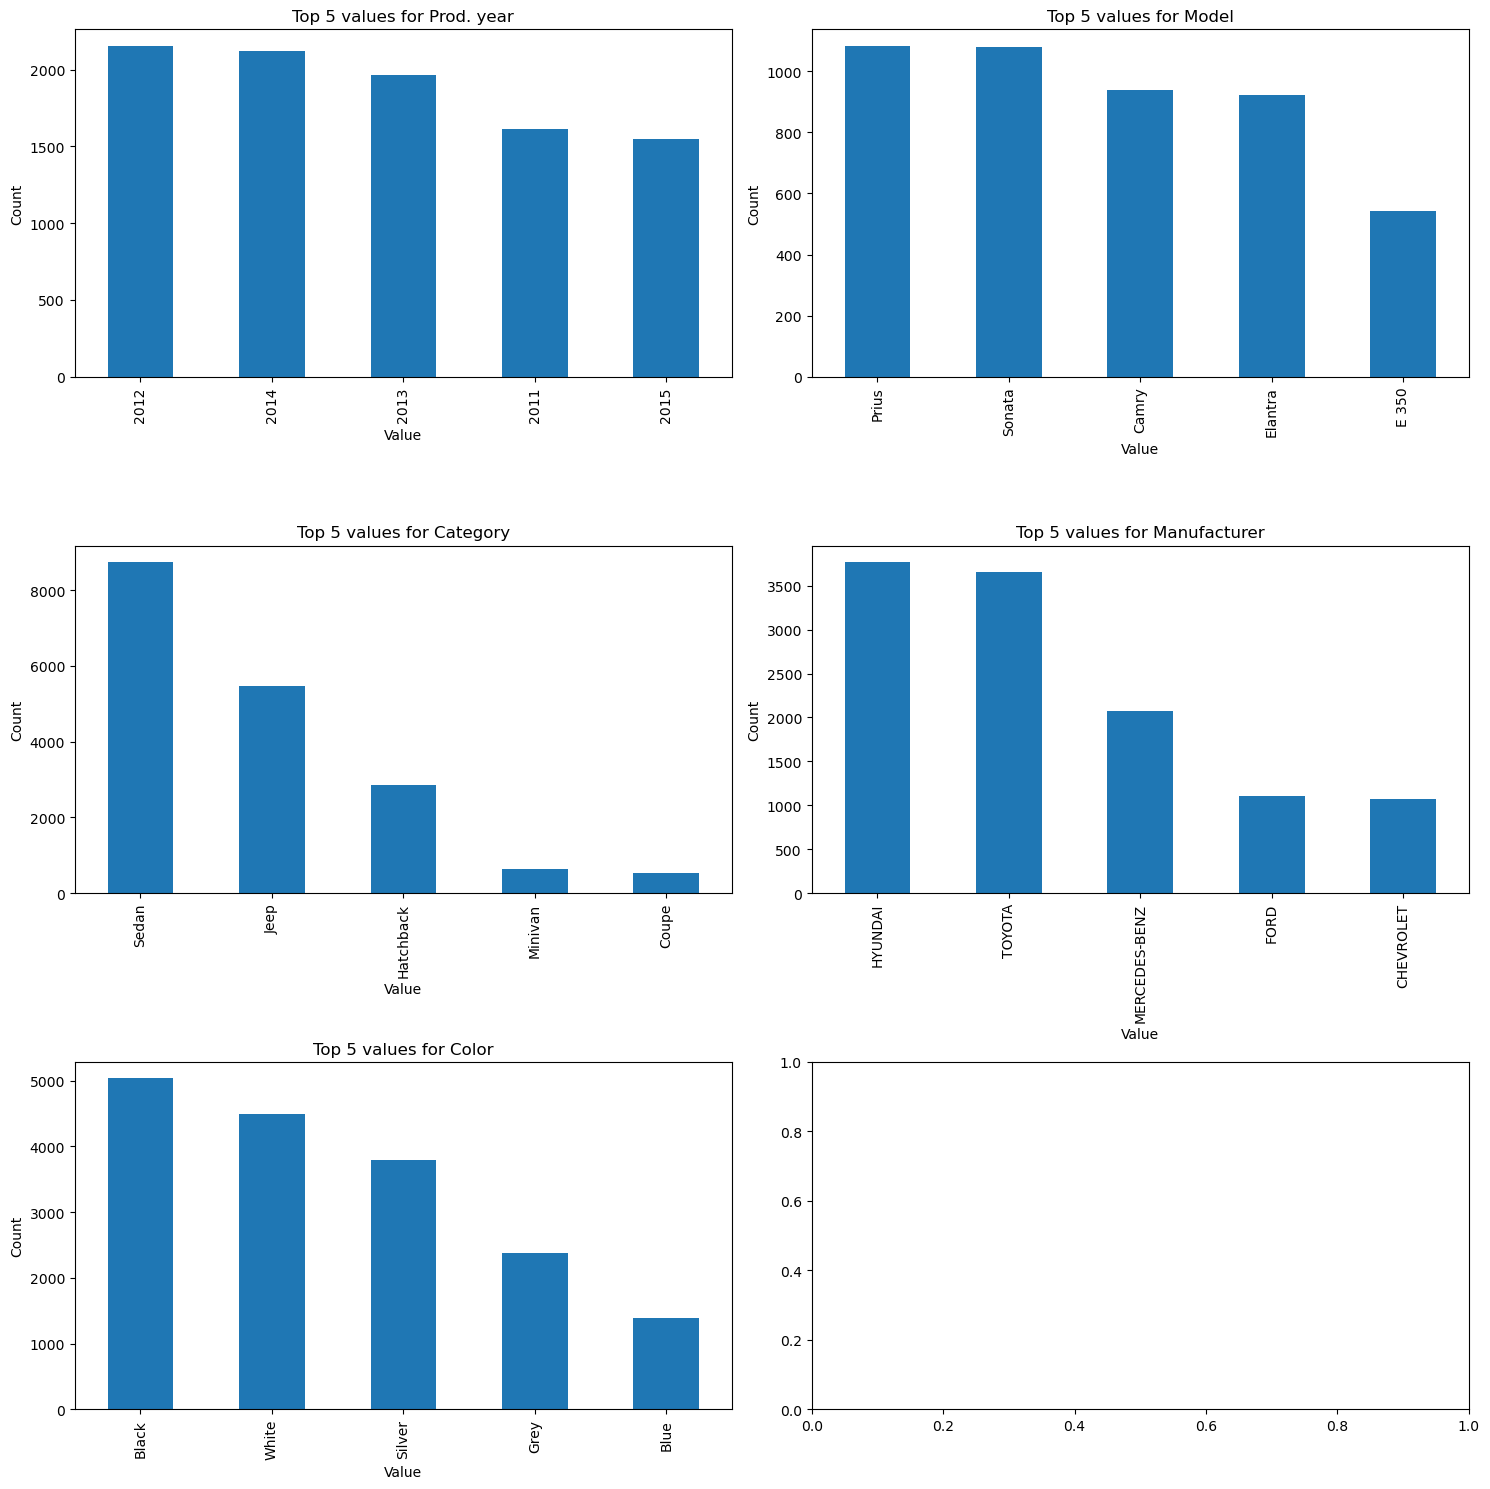

In [37]:
# Read the DataFrame from the CSV file
view_df = pd.read_csv('car_price_prediction.csv')

# Define the features
Features = ["Prod. year", "Model", "Category", "Manufacturer", "Color"]

# Plotting
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for i, feature in enumerate(Features):
    ax = axes[i//2, i%2]
    top5 = view_df[feature].value_counts().head(5)
    top5.plot(kind='bar', ax=ax)
    ax.set_title(f"Top 5 values for {feature}")
    ax.set_xlabel("Value")
    ax.set_ylabel("Count")

# Adjust layout
plt.tight_layout()
plt.show()



## The Most common Prod.year = 2012 with 2155   # The most common Category was Sedan with 8763

## The most common model was Prius with 1083

## The most common Category was Sedan with 8763

## The most common Manufactuer was Hyundai with 3769

## The most common color was Black with 5033

# We need to normalize the data, so all the features have the same scale.

In [43]:
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()

# Fit the normalizer to your data and transform the data
normalized_data = normalizer.fit_transform(df)

# Create a new DataFrame with the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

# After we normalize. We can see the correlation between each features

In [39]:
hcorr = normalized_df.corr()
hcorr.style.background_gradient()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
Price,1.000000,0.058520,-0.064586,0.096964,0.325283,-0.122119,0.013248,-0.086152,0.009806,-0.010343,-0.042980,0.088311,0.027613,0.024457,-0.055380,0.016446,-0.229044
Levy,0.058520,1.000000,0.023796,-0.006762,-0.212995,-0.062406,0.020897,0.104786,0.690013,0.013784,0.629978,-0.003300,-0.211384,-0.078517,0.213968,-0.066494,0.102949
Manufacturer,-0.064586,0.023796,1.000000,-0.127341,-0.023561,-0.052294,-0.156815,-0.041193,0.060921,0.006554,-0.003541,0.141327,-0.027958,0.041166,0.080481,0.008742,0.324991
Model,0.096964,-0.006762,-0.127341,1.000000,0.001291,-0.165873,0.014247,-0.180794,0.021876,0.015264,0.016890,-0.041020,-0.130153,0.072896,-0.073563,0.055142,-0.148470
Prod. year,0.325283,-0.212995,-0.023561,0.001291,1.000000,0.089728,0.126332,0.128075,-0.106260,-0.057627,-0.153116,-0.086505,0.053527,0.064748,-0.054340,-0.011294,0.043728
Category,-0.122119,-0.062406,-0.052294,-0.165873,0.089728,1.000000,0.080022,0.151389,-0.009069,0.009283,-0.105678,0.002510,0.176644,0.188300,-0.116389,-0.012301,0.143166
Leather interior,0.013248,0.020897,-0.156815,0.014247,0.126332,0.080022,1.000000,-0.102212,0.198130,-0.022401,0.152162,-0.405091,-0.041486,0.031157,-0.326752,-0.024239,-0.016399
Fuel type,-0.086152,0.104786,-0.041193,-0.180794,0.128075,0.151389,-0.102212,1.000000,0.052148,-0.020808,0.084868,0.130399,-0.046069,-0.029903,0.008170,-0.062702,0.097340
Engine volume,0.009806,0.690013,0.060921,0.021876,-0.106260,-0.009069,0.198130,0.052148,1.000000,-0.003794,0.846777,-0.064611,-0.336715,-0.061290,-0.156312,-0.118434,0.219195
Mileage,-0.010343,0.013784,0.006554,0.015264,-0.057627,0.009283,-0.022401,-0.020808,-0.003794,1.000000,-0.002461,0.009042,0.001252,0.000951,-0.002058,-0.002914,-0.005489


## We can see a correlation between Levy and Engine Volume and Cylinder. We also see a correlation between Cylinder and Engine Value

## The biggest correlation to Price is the Prod. year or the model year

In [4]:
# The model was better with duplicate 


# Remove duplicates

# normalized_df = normalized_df.drop_duplicates()

# Next Step is to split the data into training, validation, testing

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y = normalized_df['Price'] 
X = normalized_df.drop(columns=['Price'])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)


from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Define models with regularization
models = [
    ['Linear Regression', LinearRegression()],
    ['Ridge Regression', Ridge()],
    ['Lasso Regression', Lasso()]
]

# Define hyperparameter grids for Ridge and Lasso
param_grid_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10, 1000]}
param_grid_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10, 1000]}

# Initialize GridSearchCV for Ridge and Lasso
grid_search_ridge = GridSearchCV(Ridge(), param_grid=param_grid_ridge, scoring='neg_mean_squared_error', cv=6)
grid_search_lasso = GridSearchCV(Lasso(), param_grid=param_grid_lasso, scoring='neg_mean_squared_error', cv=6)

# Perform hyperparameter tuning
grid_search_ridge.fit(X_train, y_train)
best_ridge_model = grid_search_ridge.best_estimator_

grid_search_lasso.fit(X_train, y_train)
best_lasso_model = grid_search_lasso.best_estimator_

# List to store predictions
predictions = []

# Define models with names and instances
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', best_ridge_model),
    ('Lasso Regression', best_lasso_model)
]

# Perform model training and prediction
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions.append((name, y_pred))  # Store predictions for each model

# Evaluate models and print results
for name, y_pred in predictions:
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)  # Calculate R-squared score

    print('Model:', name)
    print(f'Mean Squared Error: {mse:.2f}')
    print(f'Mean Absolute Error: {mae:.2f}')
    print(f'R-squared Score: {r2:.2f}')  # Print R-squared score
    print('--------------------------\n') 



Model: Linear Regression
Mean Squared Error: 0.76
Mean Absolute Error: 0.64
R-squared Score: 0.29
--------------------------

Model: Ridge Regression
Mean Squared Error: 0.77
Mean Absolute Error: 0.64
R-squared Score: 0.28
--------------------------

Model: Lasso Regression
Mean Squared Error: 0.76
Mean Absolute Error: 0.64
R-squared Score: 0.28
--------------------------



In [45]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the RandomForestRegressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred_regressor = rf_regressor.predict(X_test) 

mse = mean_squared_error(y_test, y_pred_regressor)
mae = mean_absolute_error(y_test, y_pred_regressor)
r2 = r2_score(y_test, y_pred_regressor)  # Calculate R-squared score

print('Model: Random Forest Regressor')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-squared Score: {r2:.2f}')  # Print R-squared score
print('--------------------------\n')

Model: Random Forest Regressor
Mean Squared Error: 0.19
Mean Absolute Error: 0.22
R-squared Score: 0.82
--------------------------

